# Introduction

The objective of this project is to build a model that accurately predicts whether or not clients will be likely to stay customers to Telecom or eventually leave. We will base the predictive power of the model based on the AUC-ROC score along with accuracy score. 

In [1]:
pip install Catboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


# Data Preprocessing and Exploration

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import fbeta_score, make_scorer
from warnings import simplefilter
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from zipfile import ZipFile
import glob
import zipfile
import os
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import roc_auc_score
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from catboost import CatBoostClassifier
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import functools as ft
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

# Importing Files

In [5]:
file_name='final_provider.zip'

In [6]:
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
    zip.extractall()

File Name                                             Modified             Size
final_provider/                                2020-04-29 20:35:26            0
final_provider/personal.csv                    2020-04-30 13:02:26       181571
__MACOSX/final_provider/._personal.csv         2020-04-30 13:02:26          233
final_provider/contract.csv                    2020-04-30 13:02:28       545798
final_provider/phone.csv                       2020-04-30 13:02:26        92050
__MACOSX/final_provider/._phone.csv            2020-04-30 13:02:26          233
final_provider/internet.csv                    2020-04-30 13:02:26       221294


In [7]:
personal=pd.read_csv('final_provider/personal.csv')
personal


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No


In [8]:
personal.isna().sum()
personal.duplicated().sum()

0

* The personal file has 7043 rows 
* No missing data
* No duplicate rows

In [9]:
contract=pd.read_csv('final_provider/contract.csv')
contract

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6


In [10]:
contract.isna().sum()
contract.duplicated().sum()

0

* The contract file has 7043 rows 
* No missing data
* No duplicate rows

In [11]:
internet=pd.read_csv('final_provider/internet.csv')
internet

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...
5512,6840-RESVB,DSL,Yes,No,Yes,Yes,Yes,Yes
5513,2234-XADUH,Fiber optic,No,Yes,Yes,No,Yes,Yes
5514,4801-JZAZL,DSL,Yes,No,No,No,No,No
5515,8361-LTMKD,Fiber optic,No,No,No,No,No,No


In [12]:
len(internet)

5517

In [13]:
internet.isna().sum()
internet.duplicated().sum()

0

* The internet file has 5517 rows
* No missing data
* No duplicate rows
* We will need to create a new column called 'internet_customer' in order to keep these files when we merge all the files together. We will take care of missing values after that

In [14]:
internet['internet_customer'] = 'Yes'

In [15]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customerID         5517 non-null   object
 1   InternetService    5517 non-null   object
 2   OnlineSecurity     5517 non-null   object
 3   OnlineBackup       5517 non-null   object
 4   DeviceProtection   5517 non-null   object
 5   TechSupport        5517 non-null   object
 6   StreamingTV        5517 non-null   object
 7   StreamingMovies    5517 non-null   object
 8   internet_customer  5517 non-null   object
dtypes: object(9)
memory usage: 388.0+ KB


In [16]:
phone=pd.read_csv('final_provider/phone.csv')
phone

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
...,...,...
6356,2569-WGERO,No
6357,6840-RESVB,Yes
6358,2234-XADUH,Yes
6359,8361-LTMKD,Yes


In [17]:
phone.isna().sum()
phone.duplicated().sum()

0

* The phone file has 6361 rows 
* No missing data
* No duplicates
* As with the internet file, we will need to create a new column called 'phone_customer' in order to prevent data loss when we merge.

In [18]:
phone['phone_customer'] = 'Yes'

In [19]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customerID      6361 non-null   object
 1   MultipleLines   6361 non-null   object
 2   phone_customer  6361 non-null   object
dtypes: object(3)
memory usage: 149.2+ KB


In [20]:
data_frames= [personal, contract, internet, phone]
complete_file= ft.reduce(lambda left, right: pd.merge(left, right, how='outer'), data_frames)

In [21]:
complete_file

,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,internet_customer,MultipleLines,phone_customer
0,7590-VHVEG,Female,0,Yes,No,2020-01-01,No,Month-to-month,Yes,Electronic check,...,DSL,No,Yes,No,No,No,No,Yes,NaN,NaN
1,5575-GNVDE,Male,0,No,No,2017-04-01,No,One year,No,Mailed check,...,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes
2,3668-QPYBK,Male,0,No,No,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,...,DSL,Yes,Yes,No,No,No,No,Yes,No,Yes
3,7795-CFOCW,Male,0,No,No,2016-05-01,No,One year,No,Bank transfer (automatic),...,DSL,Yes,No,Yes,Yes,No,No,Yes,NaN,NaN
4,9237-HQITU,Female,0,No,No,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,...,Fiber optic,No,No,No,No,No,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,2018-02-01,No,One year,Yes,Mailed check,...,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes,2014-02-01,No,One year,Yes,Credit card (automatic),...,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes,2019-03-01,No,Month-to-month,Yes,Electronic check,...,DSL,Yes,No,No,No,No,No,Yes,NaN,NaN
7041,8361-LTMKD,Male,1,Yes,No,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,...,Fiber optic,No,No,No,No,No,No,Yes,Yes,Yes


In [22]:
complete_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customerID         7043 non-null   object 
 1   gender             7043 non-null   object 
 2   SeniorCitizen      7043 non-null   int64  
 3   Partner            7043 non-null   object 
 4   Dependents         7043 non-null   object 
 5   BeginDate          7043 non-null   object 
 6   EndDate            7043 non-null   object 
 7   Type               7043 non-null   object 
 8   PaperlessBilling   7043 non-null   object 
 9   PaymentMethod      7043 non-null   object 
 10  MonthlyCharges     7043 non-null   float64
 11  TotalCharges       7043 non-null   object 
 12  InternetService    5517 non-null   object 
 13  OnlineSecurity     5517 non-null   object 
 14  OnlineBackup       5517 non-null   object 
 15  DeviceProtection   5517 non-null   object 
 16  TechSupport        5517 

In [23]:
complete_file.isna().sum()

customerID              0
gender                  0
SeniorCitizen           0
Partner                 0
Dependents              0
BeginDate               0
EndDate                 0
Type                    0
PaperlessBilling        0
PaymentMethod           0
MonthlyCharges          0
TotalCharges            0
InternetService      1526
OnlineSecurity       1526
OnlineBackup         1526
DeviceProtection     1526
TechSupport          1526
StreamingTV          1526
StreamingMovies      1526
internet_customer    1526
MultipleLines         682
phone_customer        682
dtype: int64

In [24]:
complete_file.duplicated().sum()

0

* All Files are concatonated into one complete dataframe.
* We will adjust the column names to so that they are all lowercase
* There are 1526 missing values in 8 columns, and 682 missing values in 2 columns
* There are no duplicate values

In [25]:
complete_file= complete_file.rename({'customerID': 'customer_id', 'SeniorCitizen': 'senior_citizen', 'Partner': 'partner', 'Dependents': 'dependents', 'BeginDate': 'begin_date', 'EndDate': 'end_date', 'Type': 'type', 'PaperlessBilling': 'paperless_billing', 'PaymentMethod': 'payment_method', 'MonthlyCharges': 'monthly_charges', 'TotalCharges': 'total_charges', 'InternetService': 'internet_service', 'OnlineSecurity': 'online_security', 'OnlineBackup': 'online_backup', 'DeviceProtection': 'device_protection', 'TechSupport': 'tech_support', 'StreamingTV': 'streaming_tv', 'StreamingMovies':'streaming_movies', 'MultipleLines': 'multiple_lines'}, axis=1)

In [26]:
complete_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   gender             7043 non-null   object 
 2   senior_citizen     7043 non-null   int64  
 3   partner            7043 non-null   object 
 4   dependents         7043 non-null   object 
 5   begin_date         7043 non-null   object 
 6   end_date           7043 non-null   object 
 7   type               7043 non-null   object 
 8   paperless_billing  7043 non-null   object 
 9   payment_method     7043 non-null   object 
 10  monthly_charges    7043 non-null   float64
 11  total_charges      7043 non-null   object 
 12  internet_service   5517 non-null   object 
 13  online_security    5517 non-null   object 
 14  online_backup      5517 non-null   object 
 15  device_protection  5517 non-null   object 
 16  tech_support       5517 

In [27]:
complete_file['begin_date'].head(1)

0    2020-01-01
Name: begin_date, dtype: object

In [28]:
#change begin_date to datetime
complete_file['begin_date'] = pd.to_datetime(complete_file['begin_date'], format= '%Y-%m-%d')


In [29]:
complete_file['begin_date'].head(5)

0   2020-01-01
1   2017-04-01
2   2019-10-01
3   2016-05-01
4   2019-09-01
Name: begin_date, dtype: datetime64[ns]

In [30]:
#create column for target based on end_date 
def is_customer(row):
    val= row['end_date']
    if val == 'No':
        return 0
    else: 
        return 1

In [31]:
complete_file['is_customer'] = complete_file.apply(is_customer, axis=1)

In [32]:
#make sure new column is established and do value_counts()
complete_file['is_customer'].value_counts()

0    5174
1    1869
Name: is_customer, dtype: int64

* We observe a class imbalance of the target, wherein there are 5174 lost customers and 1869 existing customers

In [33]:
complete_file['end_date'].value_counts()

No                     5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: end_date, dtype: int64

In [34]:
#information provided indicated that the contract information is valid as of February 1st, 2020, so we will change all the 'No' values in the 'end_date' column to this date
#complete_file.loc[complete_file['end_date'] == 'No', 'end_date'] == '2020-02-01 00:00:00'
complete_file['end_date'].replace('No', '2020-02-01 00:00:00', inplace=True)

In [35]:
complete_file['end_date'].value_counts()

2020-02-01 00:00:00    5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: end_date, dtype: int64

In [36]:
#change 'end_date' to_datetime
complete_file['end_date']= pd.to_datetime(complete_file['end_date'], format='%Y-%m-%d')

In [37]:
complete_file['end_date'].info()

<class 'pandas.core.series.Series'>
Int64Index: 7043 entries, 0 to 7042
Series name: end_date
Non-Null Count  Dtype         
--------------  -----         
7043 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 110.0 KB


In [38]:
#create a new column that will tell us the span of each customer's plan
final_date= pd.to_datetime('2020-02-01')
complete_file['service_span']= (final_date - complete_file['begin_date']).dt.days

In [39]:
complete_file["service_span"].value_counts()

2191    366
123     237
92      237
153     237
31      233
       ... 
0        11
2222      7
2314      3
2253      3
2283      2
Name: service_span, Length: 77, dtype: int64

In [40]:
complete_file.query('service_span == 0')

,customer_id,gender,senior_citizen,partner,dependents,begin_date,end_date,type,paperless_billing,payment_method,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,internet_customer,multiple_lines,phone_customer,is_customer,service_span
488,4472-LVYGI,Female,0,Yes,Yes,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),...,No,Yes,Yes,Yes,No,Yes,NaN,NaN,0,0
753,3115-CZMZD,Male,0,No,Yes,2020-02-01,2020-02-01,Two year,No,Mailed check,...,NaN,NaN,NaN,NaN,NaN,NaN,No,Yes,0,0
936,5709-LVOEQ,Female,0,Yes,Yes,2020-02-01,2020-02-01,Two year,No,Mailed check,...,Yes,Yes,No,Yes,Yes,Yes,No,Yes,0,0
1082,4367-NUYAO,Male,0,Yes,Yes,2020-02-01,2020-02-01,Two year,No,Mailed check,...,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,0,0
1340,1371-DWPAZ,Female,0,Yes,Yes,2020-02-01,2020-02-01,Two year,No,Credit card (automatic),...,Yes,Yes,Yes,Yes,No,Yes,NaN,NaN,0,0
3331,7644-OMVMY,Male,0,Yes,Yes,2020-02-01,2020-02-01,Two year,No,Mailed check,...,NaN,NaN,NaN,NaN,NaN,NaN,No,Yes,0,0
3826,3213-VVOLG,Male,0,Yes,Yes,2020-02-01,2020-02-01,Two year,No,Mailed check,...,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,0,0
4380,2520-SGTTA,Female,0,Yes,Yes,2020-02-01,2020-02-01,Two year,No,Mailed check,...,NaN,NaN,NaN,NaN,NaN,NaN,No,Yes,0,0
5218,2923-ARZLG,Male,0,Yes,Yes,2020-02-01,2020-02-01,One year,Yes,Mailed check,...,NaN,NaN,NaN,NaN,NaN,NaN,No,Yes,0,0
6670,4075-WKNIU,Female,0,Yes,Yes,2020-02-01,2020-02-01,Two year,No,Mailed check,...,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,0,0


* All users with a service span of 0 have a begin_date value of 2020-02-01, which is to be expected. I will go ahead and remove these rows, as these customers have not churned yet.

In [41]:
complete_file['total_charges']=pd.to_numeric(complete_file['total_charges'], errors='coerce')

In [42]:
complete_file['total_charges'].dtype

dtype('float64')

* The 'total_charges' column has been changed to the correct datatype

In [43]:
complete_file.isna().sum()

customer_id             0
gender                  0
senior_citizen          0
partner                 0
dependents              0
begin_date              0
end_date                0
type                    0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges          11
internet_service     1526
online_security      1526
online_backup        1526
device_protection    1526
tech_support         1526
streaming_tv         1526
streaming_movies     1526
internet_customer    1526
multiple_lines        682
phone_customer        682
is_customer             0
service_span            0
dtype: int64

* We see that there are now 11 total missing values in the total_charges column

In [44]:
complete_file.loc[complete_file['total_charges'].isna()]

,customer_id,gender,senior_citizen,partner,dependents,begin_date,end_date,type,paperless_billing,payment_method,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,internet_customer,multiple_lines,phone_customer,is_customer,service_span
488,4472-LVYGI,Female,0,Yes,Yes,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),...,No,Yes,Yes,Yes,No,Yes,NaN,NaN,0,0
753,3115-CZMZD,Male,0,No,Yes,2020-02-01,2020-02-01,Two year,No,Mailed check,...,NaN,NaN,NaN,NaN,NaN,NaN,No,Yes,0,0
936,5709-LVOEQ,Female,0,Yes,Yes,2020-02-01,2020-02-01,Two year,No,Mailed check,...,Yes,Yes,No,Yes,Yes,Yes,No,Yes,0,0
1082,4367-NUYAO,Male,0,Yes,Yes,2020-02-01,2020-02-01,Two year,No,Mailed check,...,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,0,0
1340,1371-DWPAZ,Female,0,Yes,Yes,2020-02-01,2020-02-01,Two year,No,Credit card (automatic),...,Yes,Yes,Yes,Yes,No,Yes,NaN,NaN,0,0
3331,7644-OMVMY,Male,0,Yes,Yes,2020-02-01,2020-02-01,Two year,No,Mailed check,...,NaN,NaN,NaN,NaN,NaN,NaN,No,Yes,0,0
3826,3213-VVOLG,Male,0,Yes,Yes,2020-02-01,2020-02-01,Two year,No,Mailed check,...,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,0,0
4380,2520-SGTTA,Female,0,Yes,Yes,2020-02-01,2020-02-01,Two year,No,Mailed check,...,NaN,NaN,NaN,NaN,NaN,NaN,No,Yes,0,0
5218,2923-ARZLG,Male,0,Yes,Yes,2020-02-01,2020-02-01,One year,Yes,Mailed check,...,NaN,NaN,NaN,NaN,NaN,NaN,No,Yes,0,0
6670,4075-WKNIU,Female,0,Yes,Yes,2020-02-01,2020-02-01,Two year,No,Mailed check,...,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,0,0


In [45]:
columns_to_drop= complete_file.query('service_span == 0')

In [46]:
columns_to_drop

,customer_id,gender,senior_citizen,partner,dependents,begin_date,end_date,type,paperless_billing,payment_method,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,internet_customer,multiple_lines,phone_customer,is_customer,service_span
488,4472-LVYGI,Female,0,Yes,Yes,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),...,No,Yes,Yes,Yes,No,Yes,NaN,NaN,0,0
753,3115-CZMZD,Male,0,No,Yes,2020-02-01,2020-02-01,Two year,No,Mailed check,...,NaN,NaN,NaN,NaN,NaN,NaN,No,Yes,0,0
936,5709-LVOEQ,Female,0,Yes,Yes,2020-02-01,2020-02-01,Two year,No,Mailed check,...,Yes,Yes,No,Yes,Yes,Yes,No,Yes,0,0
1082,4367-NUYAO,Male,0,Yes,Yes,2020-02-01,2020-02-01,Two year,No,Mailed check,...,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,0,0
1340,1371-DWPAZ,Female,0,Yes,Yes,2020-02-01,2020-02-01,Two year,No,Credit card (automatic),...,Yes,Yes,Yes,Yes,No,Yes,NaN,NaN,0,0
3331,7644-OMVMY,Male,0,Yes,Yes,2020-02-01,2020-02-01,Two year,No,Mailed check,...,NaN,NaN,NaN,NaN,NaN,NaN,No,Yes,0,0
3826,3213-VVOLG,Male,0,Yes,Yes,2020-02-01,2020-02-01,Two year,No,Mailed check,...,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,0,0
4380,2520-SGTTA,Female,0,Yes,Yes,2020-02-01,2020-02-01,Two year,No,Mailed check,...,NaN,NaN,NaN,NaN,NaN,NaN,No,Yes,0,0
5218,2923-ARZLG,Male,0,Yes,Yes,2020-02-01,2020-02-01,One year,Yes,Mailed check,...,NaN,NaN,NaN,NaN,NaN,NaN,No,Yes,0,0
6670,4075-WKNIU,Female,0,Yes,Yes,2020-02-01,2020-02-01,Two year,No,Mailed check,...,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,0,0


In [47]:
complete_file.drop(complete_file.loc[complete_file['service_span']==0].index, inplace=True)

In [48]:
complete_file['service_span'].value_counts()

2191    366
123     237
92      237
153     237
31      233
       ... 
1187     50
2222      7
2314      3
2253      3
2283      2
Name: service_span, Length: 76, dtype: int64

In [49]:
complete_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7032 non-null   object        
 1   gender             7032 non-null   object        
 2   senior_citizen     7032 non-null   int64         
 3   partner            7032 non-null   object        
 4   dependents         7032 non-null   object        
 5   begin_date         7032 non-null   datetime64[ns]
 6   end_date           7032 non-null   datetime64[ns]
 7   type               7032 non-null   object        
 8   paperless_billing  7032 non-null   object        
 9   payment_method     7032 non-null   object        
 10  monthly_charges    7032 non-null   float64       
 11  total_charges      7032 non-null   float64       
 12  internet_service   5512 non-null   object        
 13  online_security    5512 non-null   object        
 14  online_b

In [50]:
complete_file.isna().sum()

customer_id             0
gender                  0
senior_citizen          0
partner                 0
dependents              0
begin_date              0
end_date                0
type                    0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges           0
internet_service     1520
online_security      1520
online_backup        1520
device_protection    1520
tech_support         1520
streaming_tv         1520
streaming_movies     1520
internet_customer    1520
multiple_lines        680
phone_customer        680
is_customer             0
service_span            0
dtype: int64

* We note that the 11 missing values in total_charges were all customers who have a begin_date of 2020-02-01 (service_span=0).
* We dropped the 11 rows with missing values (which were the same rows that contained '0' as a value in the service_span column. * We justify dropping these rows because they contained customers who just started the service which means they haven't churned yet.
* The proportion of missing values here is small enough to justify this.

In [51]:
#check that missing data in total_charges have been dropped
beginners= complete_file.query('service_span == 0')
beginners[['monthly_charges', 'total_charges']]

,monthly_charges,total_charges


In [52]:
complete_file['total_charges'].value_counts()

20.20      11
19.75       9
20.05       8
19.90       8
19.65       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: total_charges, Length: 6530, dtype: int64

In [53]:
complete_file.isna().sum()

customer_id             0
gender                  0
senior_citizen          0
partner                 0
dependents              0
begin_date              0
end_date                0
type                    0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges           0
internet_service     1520
online_security      1520
online_backup        1520
device_protection    1520
tech_support         1520
streaming_tv         1520
streaming_movies     1520
internet_customer    1520
multiple_lines        680
phone_customer        680
is_customer             0
service_span            0
dtype: int64

* It appears as though all columns missing 1526 values are associated with internet service. The missing values are probably due to the customer not having internet service to begin with on their plan.
* Let's have a look at their value counts

In [54]:
columns= [complete_file.internet_service, complete_file.online_security, complete_file.online_backup, complete_file.device_protection, complete_file.tech_support, complete_file.streaming_tv, complete_file.streaming_movies, complete_file.internet_customer]
for x in columns:
    print(x.value_counts())

Fiber optic    3096
DSL            2416
Name: internet_service, dtype: int64
No     3497
Yes    2015
Name: online_security, dtype: int64
No     3087
Yes    2425
Name: online_backup, dtype: int64
No     3094
Yes    2418
Name: device_protection, dtype: int64
No     3472
Yes    2040
Name: tech_support, dtype: int64
No     2809
Yes    2703
Name: streaming_tv, dtype: int64
No     2781
Yes    2731
Name: streaming_movies, dtype: int64
Yes    5512
Name: internet_customer, dtype: int64


* We confirm that missing values are due to not being an internet customer, we we will replace missing values with 'No' for all columns

In [55]:
#replace missing values with no by default
complete_file=complete_file.fillna('No')

In [56]:
complete_file.isna().sum()

customer_id          0
gender               0
senior_citizen       0
partner              0
dependents           0
begin_date           0
end_date             0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
internet_customer    0
multiple_lines       0
phone_customer       0
is_customer          0
service_span         0
dtype: int64

* There are now now missing values

* The customer_id column and begin_date and end_date columns will be dropped as they are not useful for model training. In addition, including these date columns might lead to data leakage.

In [57]:
new_file=complete_file.drop(columns=['customer_id', 'begin_date', 'end_date'])

In [58]:
new_file.isna().sum()

gender               0
senior_citizen       0
partner              0
dependents           0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
internet_customer    0
multiple_lines       0
phone_customer       0
is_customer          0
service_span         0
dtype: int64

In [59]:
#Check that all datatypes are correct 
new_file.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             7032 non-null   object 
 1   senior_citizen     7032 non-null   int64  
 2   partner            7032 non-null   object 
 3   dependents         7032 non-null   object 
 4   type               7032 non-null   object 
 5   paperless_billing  7032 non-null   object 
 6   payment_method     7032 non-null   object 
 7   monthly_charges    7032 non-null   float64
 8   total_charges      7032 non-null   float64
 9   internet_service   7032 non-null   object 
 10  online_security    7032 non-null   object 
 11  online_backup      7032 non-null   object 
 12  device_protection  7032 non-null   object 
 13  tech_support       7032 non-null   object 
 14  streaming_tv       7032 non-null   object 
 15  streaming_movies   7032 non-null   object 
 16  internet_customer  7032 

In [60]:
new_file['payment_method'].value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: payment_method, dtype: int64

In [61]:
new_file['internet_service'].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: internet_service, dtype: int64

In [62]:
new_file['type'].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: type, dtype: int64

# Exploratory Data Analysis

In [63]:
target= new_file['is_customer']
features= new_file.drop(['is_customer'], axis=1)

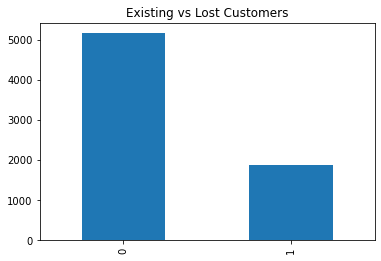

In [64]:
target.value_counts().plot(kind='bar')
plt.title('Existing vs Lost Customers')
plt.show()


* We note a clear class imbalance in the target variable, with nearly twice as much lost customers as existing customers

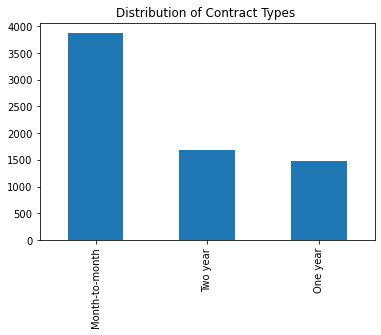

In [65]:
features['type'].value_counts().plot(kind='bar')
plt.title('Distribution of Contract Types ')
plt.show()

In [66]:
new_file['is_customer'].value_counts()

0    5163
1    1869
Name: is_customer, dtype: int64

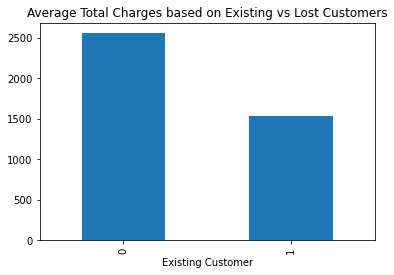

In [67]:
new_file.groupby(['is_customer'])['total_charges'].mean().plot(kind='bar')
plt.title('Average Total Charges based on Existing vs Lost Customers')
plt.xlabel('Existing Customer')
plt.show()

The average total charges for each customer type seems to have overall been higher for those customers that have left as compared to those customers that are still on a plan. 

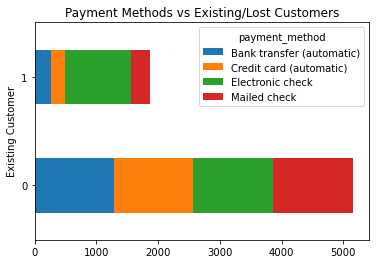

In [68]:
new_file.groupby(['is_customer'])['payment_method'].value_counts().unstack().plot(kind='barh', stacked=True)
plt.title('Payment Methods vs Existing/Lost Customers')
plt.ylabel('Existing Customer')
plt.show()

<AxesSubplot:ylabel='is_customer'>

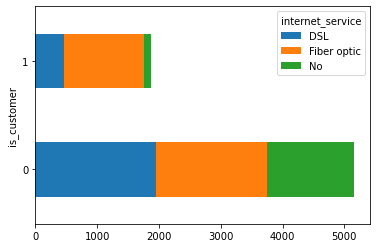

In [69]:
new_file.groupby(['is_customer'])['internet_service'].value_counts().unstack().plot(kind='barh', stacked=True)

# Observations

* Existing customers appear to opt more for the fiber optic service, wheras loss customers didn't seem to favor one over the other
* Electronic checks seem to be the primary method of payment for existing customers. Lost customers seem to be fairly distributed among the four differnt types of payment methods


In [70]:
new_file = pd.get_dummies(new_file, drop_first=True)


In [71]:
#Change column names again
columns= []
for name in new_file.columns:
    name=name.lower()
    name=name.replace(' ', '_')
    columns.append(name)

In [72]:
new_file.columns=columns

In [73]:
new_file.columns
new_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   senior_citizen                          7032 non-null   int64  
 1   monthly_charges                         7032 non-null   float64
 2   total_charges                           7032 non-null   float64
 3   is_customer                             7032 non-null   int64  
 4   service_span                            7032 non-null   int64  
 5   gender_male                             7032 non-null   uint8  
 6   partner_yes                             7032 non-null   uint8  
 7   dependents_yes                          7032 non-null   uint8  
 8   type_one_year                           7032 non-null   uint8  
 9   type_two_year                           7032 non-null   uint8  
 10  paperless_billing_yes                   7032 non-null   uint

In [74]:
#check to see if there are any notable correlations
new_file.corr()

,senior_citizen,monthly_charges,total_charges,is_customer,service_span,gender_male,partner_yes,dependents_yes,type_one_year,type_two_year,...,internet_service_no,online_security_yes,online_backup_yes,device_protection_yes,tech_support_yes,streaming_tv_yes,streaming_movies_yes,internet_customer_yes,multiple_lines_yes,phone_customer_yes
senior_citizen,1.000000,0.219874,0.102411,0.150541,0.022550,-0.001819,0.016957,-0.210550,-0.046491,-0.116205,...,-0.182519,-0.038576,0.066663,0.059514,-0.060577,0.105445,0.119842,0.182519,0.142996,0.008392
monthly_charges,0.219874,1.000000,0.651065,0.192858,0.259819,-0.013779,0.097825,-0.112343,0.004810,-0.073256,...,-0.763191,0.296447,0.441529,0.482607,0.338301,0.629668,0.627235,0.763191,0.490912,0.248033
total_charges,0.102411,0.651065,1.000000,-0.199484,0.829135,0.000048,0.319072,0.064653,0.170569,0.358036,...,-0.374878,0.412619,0.510100,0.522881,0.432868,0.515709,0.519867,0.374878,0.469042,0.113008
is_customer,0.150541,0.192858,-0.199484,1.000000,-0.313547,-0.008545,-0.149982,-0.163128,-0.178225,-0.301552,...,-0.227578,-0.171270,-0.082307,-0.066193,-0.164716,0.063254,0.060860,0.227578,0.040033,0.011691
service_span,0.022550,0.259819,0.829135,-0.313547,1.000000,0.004948,0.380747,0.158438,0.197654,0.558314,...,-0.048695,0.325653,0.362679,0.363770,0.322817,0.287705,0.292524,0.048695,0.339655,0.009047
gender_male,-0.001819,-0.013779,0.000048,-0.008545,0.004948,1.000000,-0.001379,0.010349,0.007755,-0.003603,...,0.004745,-0.016328,-0.013093,-0.000807,-0.008507,-0.007124,-0.010105,-0.004745,-0.008883,-0.007515
partner_yes,0.016957,0.097825,0.319072,-0.149982,0.380747,-0.001379,1.000000,0.452269,0.083067,0.247334,...,-0.000286,0.143346,0.141849,0.153556,0.120206,0.124483,0.118108,0.000286,0.142561,0.018397
dependents_yes,-0.210550,-0.112343,0.064653,-0.163128,0.158438,0.010349,0.452269,1.000000,0.069222,0.201699,...,0.138383,0.080786,0.023639,0.013900,0.063053,-0.016499,-0.038375,-0.138383,-0.024307,-0.001078
type_one_year,-0.046491,0.004810,0.170569,-0.178225,0.197654,0.007755,0.083067,0.069222,1.000000,-0.288843,...,0.038061,0.100658,0.084113,0.102911,0.096258,0.061930,0.064780,-0.038061,-0.003594,-0.003142
type_two_year,-0.116205,-0.073256,0.358036,-0.301552,0.558314,-0.003603,0.247334,0.201699,-0.288843,1.000000,...,0.217542,0.191698,0.111391,0.165248,0.240924,0.072124,0.075603,-0.217542,0.106618,0.004442


* There seems to be a fairly strong positive correlation (0.82) between service_span (in days) and total_charges, which makes sense because the longer a customer is on a plan, the higher their total charges will be.
* We also see a moderate-strong positive correlation (0.76) and monthly charges.
* In general we observe a moderate positive correlation between monthly charges and having internet service. In other words, if a customer has internet_service, their monthly charges are more likely to be higher than those who do not have internet service.


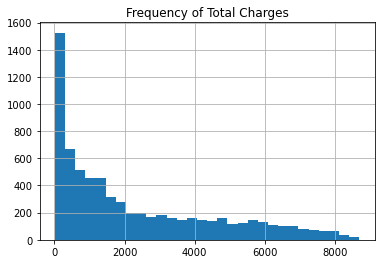

In [75]:
new_file['total_charges'].hist(bins=30)
plt.title('Frequency of Total Charges')
plt.show()

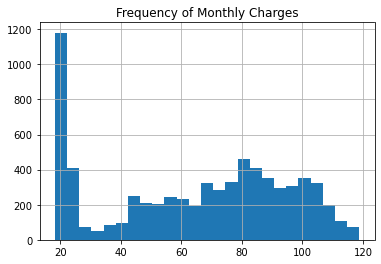

In [76]:
new_file['monthly_charges'].hist(bins=25)
plt.title('Frequency of Monthly Charges')
plt.show()

In [77]:
#Creating specific dataframes based on target to observe distributions
still_customer=new_file.query('is_customer == 1')
lost_customer=new_file.query('is_customer == 0')

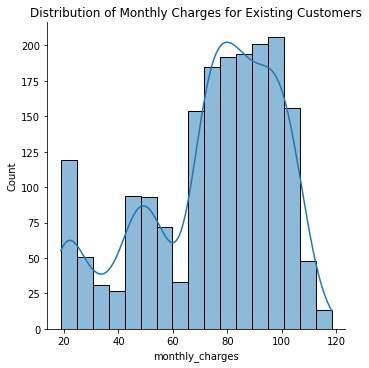

In [78]:
sns.displot(still_customer['monthly_charges'], kde=True).set(title='Distribution of Monthly Charges for Existing Customers')

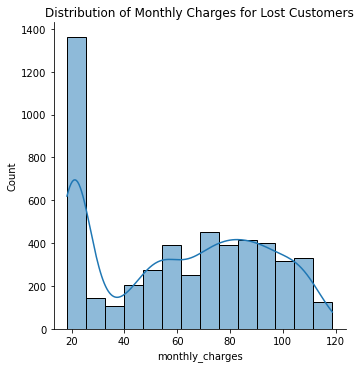

In [79]:
sns.displot(lost_customer['monthly_charges'], kde=True).set(title="Distribution of Monthly Charges for Lost Customers")

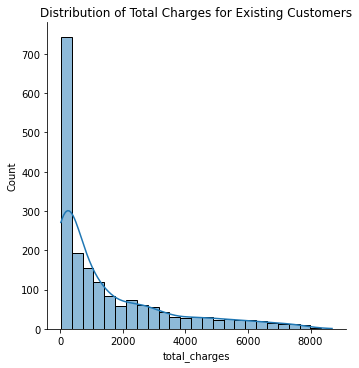

In [80]:
sns.displot(still_customer['total_charges'], kde=True).set(title='Distribution of Total Charges for Existing Customers')

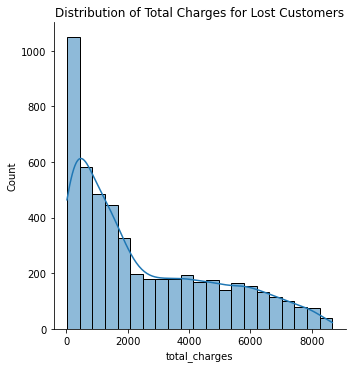

In [81]:
sns.displot(lost_customer['total_charges'], kde=True).set(title='Distribution of Total Charges for Lost Customers')

# Observations

* There is a notable difference in the distribution total charges between lost and existing customers
* Overall, the distribution of total charges for lost customers were higher than those existing customers
* The distribution of monthly charges for lost customers also were higher overall than existing customers

In [82]:
print('Average Monthly Charge for Existing customers:', round(still_customer['monthly_charges'].mean()))
print('Average Monthly Charge for Lost customers:', round(lost_customer['monthly_charges'].mean()))
print('Median Monthly Charge for Existing Customers:', round(still_customer['monthly_charges'].median()))
print('Median Monthly Charge for Lost Customers:', round(lost_customer['monthly_charges'].median()))

Average Monthly Charge for Existing customers: 74
Average Monthly Charge for Lost customers: 61
Median Monthly Charge for Existing Customers: 80
Median Monthly Charge for Lost Customers: 64


# Model Training & Selection

* Will split data into train, validation and test sets
* Will try multiple models, starting with a dummy model before selecting best model
* Hyperparameter tuning for some models will be attempted for further model improvement


In [83]:
target = new_file['is_customer']
features = new_file.drop(['is_customer'], axis=1)

In [84]:
features_train, features_test, target_train, target_test=train_test_split(features, target, test_size=.25, random_state=12345)

In [85]:
features_train, features_valid, target_train, target_valid =train_test_split(features_train, target_train, test_size=.25, random_state=12345)

In [86]:
#Using SequentialFeatureSelector to see if there are certain features which are 'best' to select 
knn=KNeighborsClassifier(n_neighbors=4)

In [87]:
sfs1=SFS(knn, k_features=20, forward=True, floating=False, verbose=2, scoring='roc_auc', cv=0)

In [88]:
sfs1.fit(features_train, target_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    2.6s finished

[2022-11-19 12:19:56] Features: 1/20 -- score: 0.8358404639752504[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.3s finished

[2022-11-19 12:19:56] Features: 2/20 -- score: 0.908556148156686[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.4s finished

[2022-11-19 12:19:57] Features: 3/20 -- score: 0.9411800628430796[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

SequentialFeatureSelector(cv=0, estimator=KNeighborsClassifier(n_neighbors=4),
                          k_features=(20, 20), scoring='roc_auc', verbose=2)

In [89]:
sfs1.subsets_

{1: {'feature_idx': (2,),
  'cv_scores': array([0.83584046]),
  'avg_score': 0.8358404639752504,
  'feature_names': ('total_charges',)},
 2: {'feature_idx': (2, 3),
  'cv_scores': array([0.90855615]),
  'avg_score': 0.908556148156686,
  'feature_names': ('total_charges', 'service_span')},
 3: {'feature_idx': (1, 2, 3),
  'cv_scores': array([0.94118006]),
  'avg_score': 0.9411800628430796,
  'feature_names': ('monthly_charges', 'total_charges', 'service_span')},
 4: {'feature_idx': (1, 2, 3, 23),
  'cv_scores': array([0.94141255]),
  'avg_score': 0.9414125481834054,
  'feature_names': ('monthly_charges',
   'total_charges',
   'service_span',
   'phone_customer_yes')},
 5: {'feature_idx': (1, 2, 3, 4, 23),
  'cv_scores': array([0.94141255]),
  'avg_score': 0.9414125481834054,
  'feature_names': ('monthly_charges',
   'total_charges',
   'service_span',
   'gender_male',
   'phone_customer_yes')},
 6: {'feature_idx': (1, 2, 3, 4, 9, 23),
  'cv_scores': array([0.94144922]),
  'avg_score':

In [90]:
sfs1.k_feature_idx_

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15, 16, 17, 19, 21, 22, 23)

* The Sequential_Feature_Selector indicated that using all the features would result in the best roc_auc scoring.
* Thus, we will not remove any features for model building

In [91]:
#scaling features
scaler=StandardScaler()
scaler.fit(features_train)
features_train_scaled=scaler.transform(features_train)

In [92]:
scaler.fit(features_valid)
features_valid_scaled=scaler.transform(features_valid)

In [93]:
scaler.fit(features_test)
features_test_scaled=scaler.transform(features_test)

In [94]:
print(features_train.shape)
print(target_train.shape)
print(features_test.shape)
print(target_test.shape)
print(features_valid.shape)
print(target_valid.shape)

(3955, 24)
(3955,)
(1758, 24)
(1758,)
(1319, 24)
(1319,)


In [95]:
training_set_prop= len(features_train + len(target_train))/len(new_file)
validation_set_prop= len(features_valid + len(target_valid)) / len(new_file)
test_set_prop= len(features_test + len(target_test)) / len(new_file)

In [96]:
print('Proportion of Split Data')
print('Training Set:', training_set_prop)
print('Validation Set:', validation_set_prop)
print('Test Set:', test_set_prop)

Proportion of Split Data
Training Set: 0.5624288964732651
Validation Set: 0.18757110352673492
Test Set: 0.25


* The function below is one that was taken from a previous sprint 

In [97]:

def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # F1 Score
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'F1 Score') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'ROC Curve')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)

# Constant Model

In [98]:
dummy_model = DummyClassifier(strategy='constant', constant=1)
dummy_model.fit(features_train, target_train)

DummyClassifier(constant=1, strategy='constant')

          train  test
Accuracy   0.27  0.27
F1         0.42  0.42
APS        0.27  0.27
ROC AUC    0.50  0.50


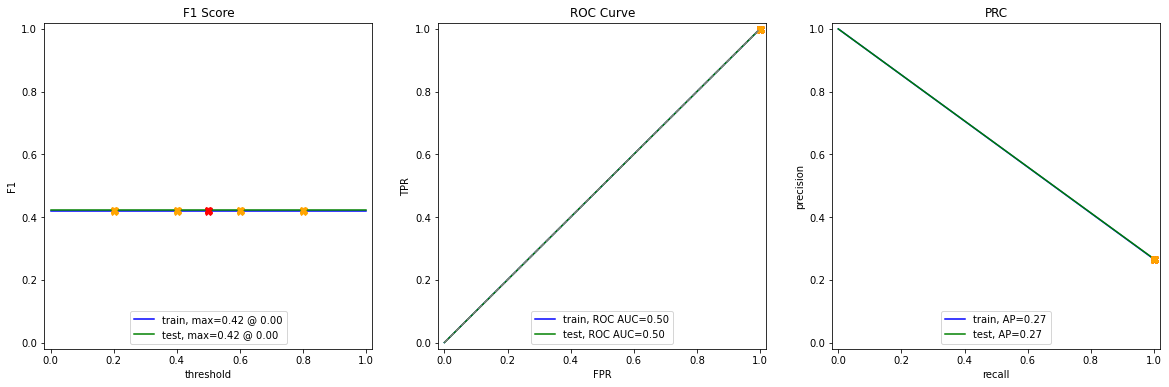

In [99]:
evaluate_model(dummy_model, features_train_scaled, target_train, features_valid_scaled, target_valid)

* The dummy model shows AUC-ROC score is .27 on accuracy on the validation set. In order for our model to pass the sanity check, we must do better than this once we run it on the test data.

In [100]:
y_pred= dummy_model.predict(features_valid_scaled)

In [101]:
cf_matrix = confusion_matrix(target_valid, y_pred)
print(cf_matrix)

[[  0 967]
 [  0 352]]


<AxesSubplot:>

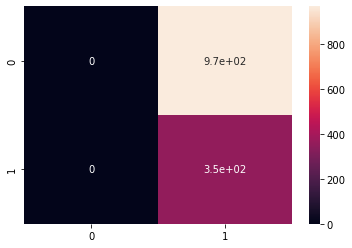

In [102]:
sns.heatmap(cf_matrix, annot=True)

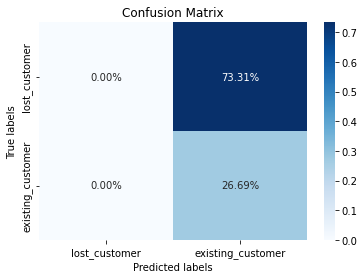

In [103]:
ax= plt.subplot()
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['lost_customer', 'existing_customer']); ax.yaxis.set_ticklabels(['lost_customer', 'existing_customer']);


According to the dummy model, the model tends to predict that a customer is an existing customer when in fact they are a lost customer. So in this case, the model has a tendency to classify false positives 73% of the time.

# Support Vector 

In [104]:
svc_model=SVC(class_weight='balanced', kernel='rbf', probability=True)

In [105]:
svc_model.fit(features_train, target_train)

SVC(class_weight='balanced', probability=True)

C:\Users\dsaad\anaconda3\New folder\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\dsaad\anaconda3\New folder\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\dsaad\anaconda3\New folder\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\dsaad\anaconda3\New folder\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


          train  test
Accuracy   0.27  0.27
F1         0.42  0.42
APS        0.52  0.53
ROC AUC    0.76  0.78


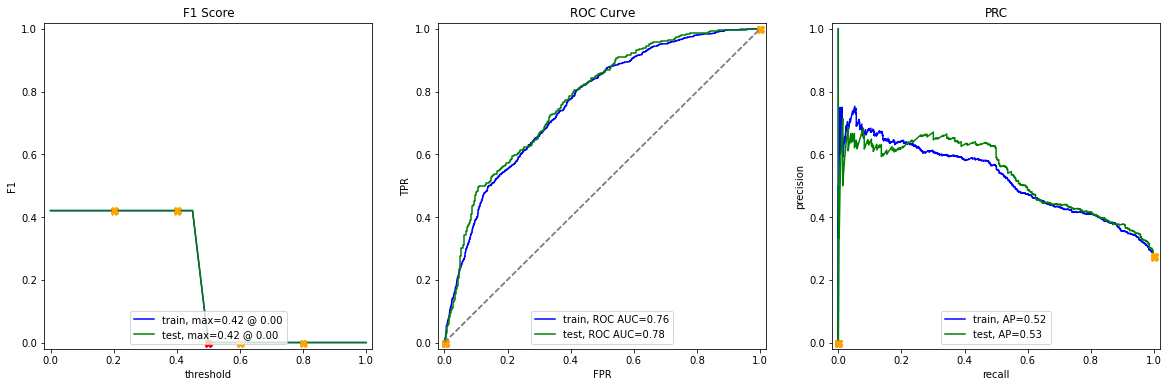

In [106]:
evaluate_model(svc_model, features_train_scaled, target_train, features_valid_scaled, target_valid)

* The support vector model above resulted in a higher AUC-ROC value, 0.78, which is better than the constant, but we will continue to try other models

# Logistic Regression

In [107]:
lr=LogisticRegression(random_state=12345, class_weight='balanced')
lr.fit(features_train_scaled, target_train)

LogisticRegression(class_weight='balanced', random_state=12345)

In [108]:
lr.predict(features_valid)

C:\Users\dsaad\anaconda3\New folder\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

          train  test
Accuracy   0.74  0.75
F1         0.62  0.64
APS        0.63  0.66
ROC AUC    0.83  0.85


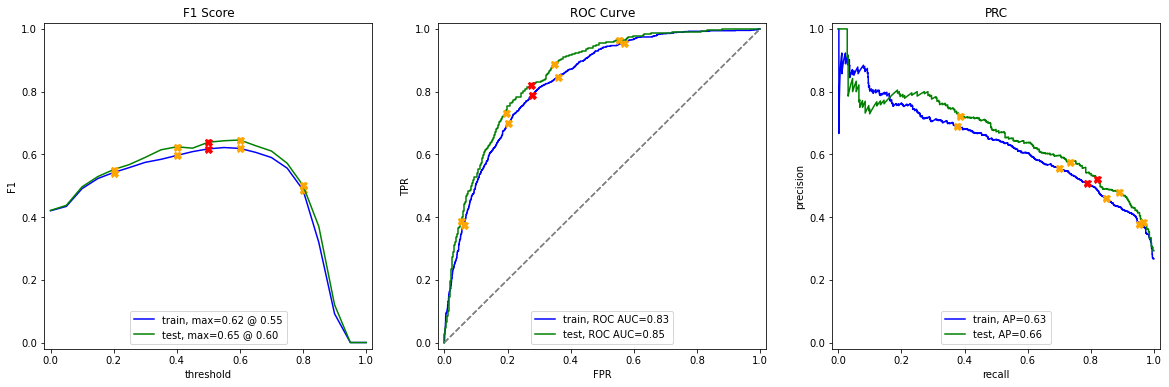

In [109]:
evaluate_model(lr, features_train_scaled, target_train, features_valid_scaled, target_valid)

* ROC-AUC score already better than dummy model at 0.82.
* The LR model does not seem to be overfitting, which is good.

# Decision Tree 

In [110]:
dt=DecisionTreeClassifier(random_state=12345, class_weight='balanced')
dt.fit(features_train_scaled, target_train)

DecisionTreeClassifier(class_weight='balanced', random_state=12345)

In [111]:
dt.predict(features_valid_scaled)

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

          train  test
Accuracy    1.0  0.82
F1          1.0  0.67
APS         1.0  0.53
ROC AUC     1.0  0.77


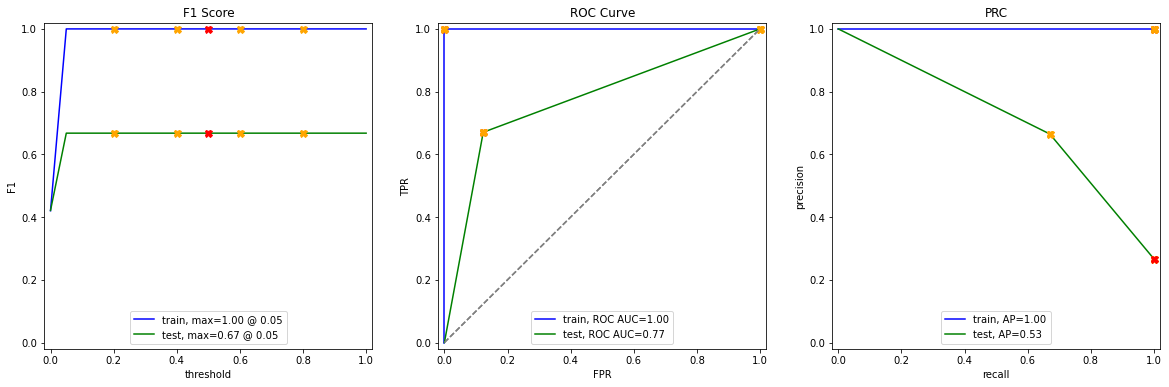

In [112]:
evaluate_model(dt, features_train_scaled, target_train, features_valid_scaled, target_valid)


* Decision Tree model performed worse that Logistic Regression
* Hyperparameter tuning may help improve this score

# Random Forest 

In [113]:
rf=RandomForestClassifier(random_state=12345, class_weight='balanced')
rf.fit(features_train_scaled, target_train)

RandomForestClassifier(class_weight='balanced', random_state=12345)

In [114]:
rf.predict(features_valid_scaled)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

          train  test
Accuracy    1.0  0.83
F1          1.0  0.63
APS         1.0  0.76
ROC AUC     1.0  0.89


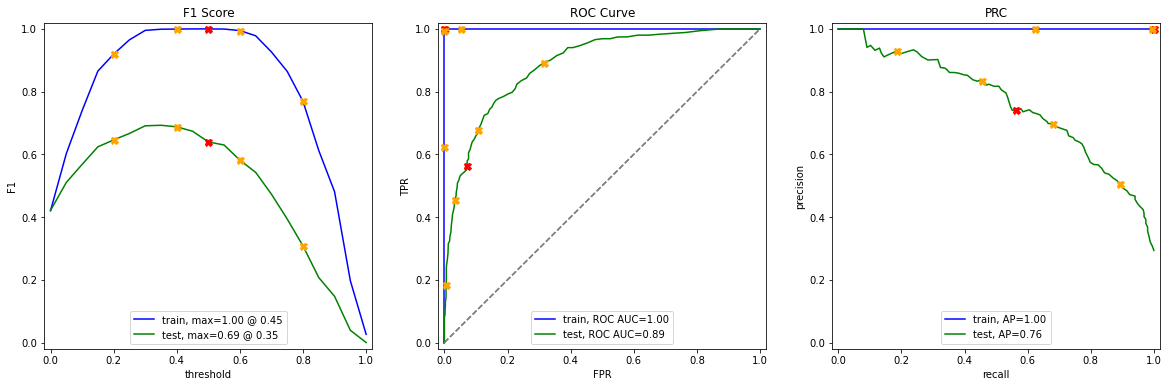

In [115]:
evaluate_model(rf, features_train_scaled, target_train, features_valid_scaled, target_valid)

* The ROC-AUC score on the validation set is getting closer to the desired threshold of .88, but still not quite there
* We will try some hyperparameter tuning to see if that improves our metric at all

In [116]:
#Tuning hyperparameters to try to improve metrics
estimators = [10, 50, 100] 
max_depths = [3, 6, 10, 15, 20] 

grid_values = {'n_estimators': estimators, 'max_depth':max_depths}

clf = GridSearchCV(RandomForestClassifier(), grid_values, scoring='roc_auc', n_jobs=-1, verbose=10, cv=3)
clf.fit(features_train_scaled, target_train)
best_n_estimators_value = clf.best_params_['n_estimators']
best_max_depth_value = clf.best_params_['max_depth']
best_score = clf.best_score_
print('Best Max Depth:', best_max_depth_value)
print('Best n_estimators:', best_n_estimators_value)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best Max Depth: 15
Best n_estimators: 100


In [117]:
print('Best Max Depth:', best_max_depth_value)
print('Best n_estimators:', best_n_estimators_value)

Best Max Depth: 15
Best n_estimators: 100


In [118]:
rf2=RandomForestClassifier(max_depth=15, n_estimators=100, random_state=12345, class_weight='balanced')

In [119]:
rf2.fit(features_train_scaled, target_train)

RandomForestClassifier(class_weight='balanced', max_depth=15,
                       random_state=12345)

          train  test
Accuracy   0.98  0.83
F1         0.97  0.66
APS        1.00  0.76
ROC AUC    1.00  0.89


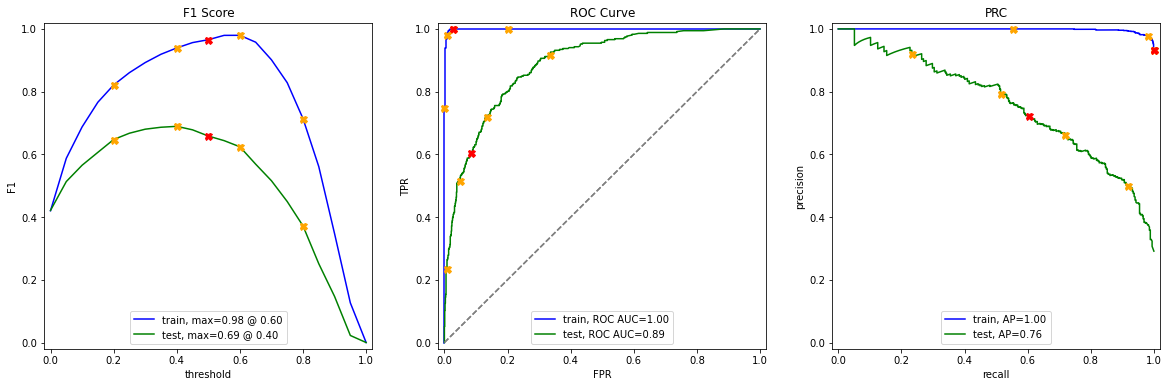

In [120]:
evaluate_model(rf2, features_train_scaled, target_train, features_valid_scaled, target_valid)

* Hyperparameter Tuning did not improve the ROC-AUC metric 
* The model is overfitting.

# CatBoost 

In [121]:
cb=CatBoostClassifier(random_state=12345, verbose=0, auto_class_weights='Balanced')
cb.fit(features_train, target_train)

          train  test
Accuracy   0.93  0.87
F1         0.88  0.76
APS        0.96  0.88
ROC AUC    0.98  0.93


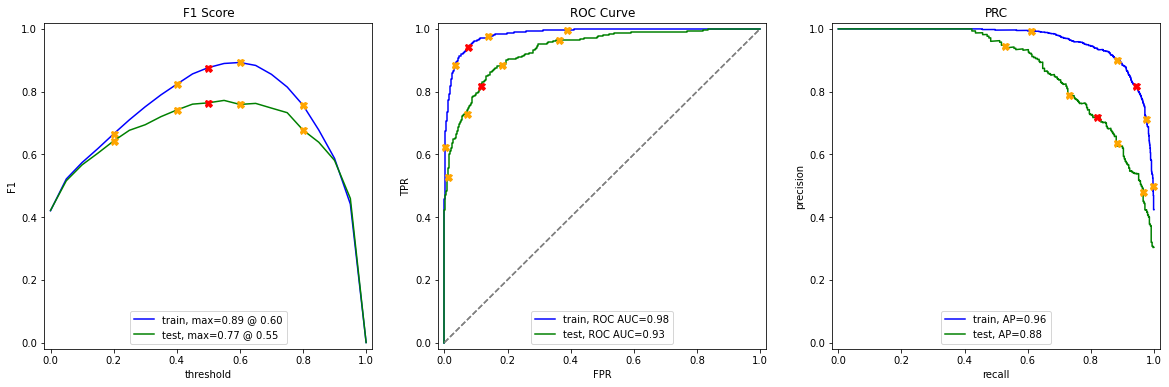

In [122]:
evaluate_model(cb, features_train, target_train, features_valid, target_valid)

* Catboost model performed much better than the tuned rf model
* The model is overfitting slightly but not as much as the rf model.

# LGBMClassifier

In [123]:
lgbm=lgb.LGBMClassifier(random_state=12345, class_weight='balanced')
lgbm.fit(features_train, target_train)


LGBMClassifier(class_weight='balanced', random_state=12345)

          train  test
Accuracy   0.97  0.89
F1         0.94  0.80
APS        0.99  0.89
ROC AUC    1.00  0.94


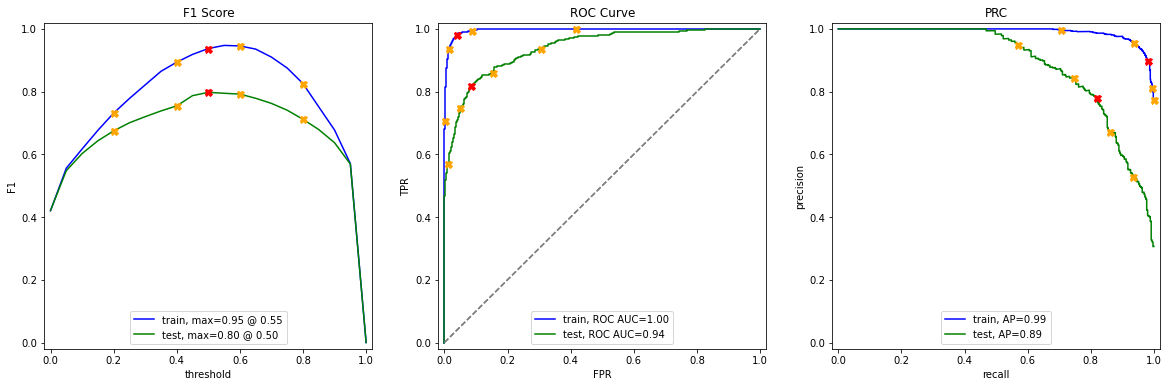

In [124]:
evaluate_model(lgbm, features_train, target_train, features_valid, target_valid)

* LGBM model performed worse than the Catboost model on the validation set.
* The model is overfitting to the train set slightly more than the catboost model.

# XGBClassifier

In [125]:
xgb=XGBClassifier(random_state=12345)
xgb.fit(features_train, target_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=12345, ...)

          train  test
Accuracy   1.00  0.89
F1         0.99  0.77
APS        1.00  0.89
ROC AUC    1.00  0.94


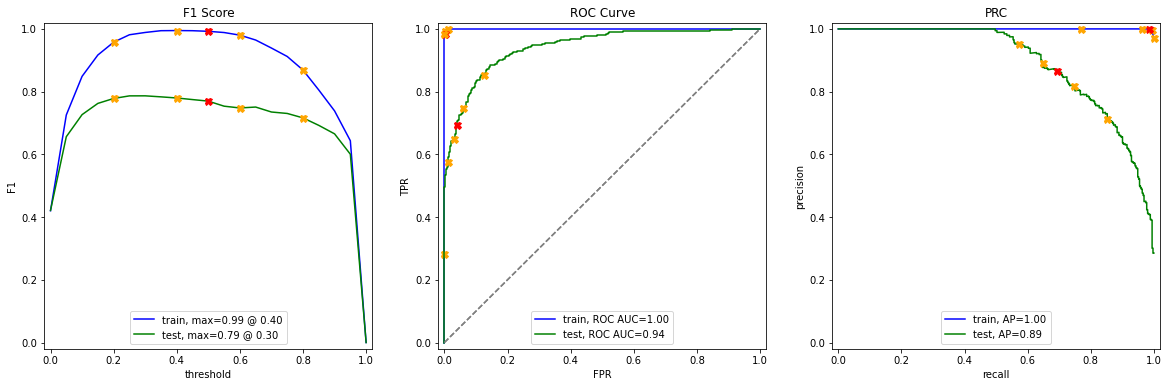

In [126]:
evaluate_model(xgb, features_train, target_train, features_valid, target_valid)

* XGB Classifier model seems to be highly overfitted on the train set
* CatBoost Model appeared to have the highest ROC-AUC score on the validation set (.92), so I will select that as the final model.


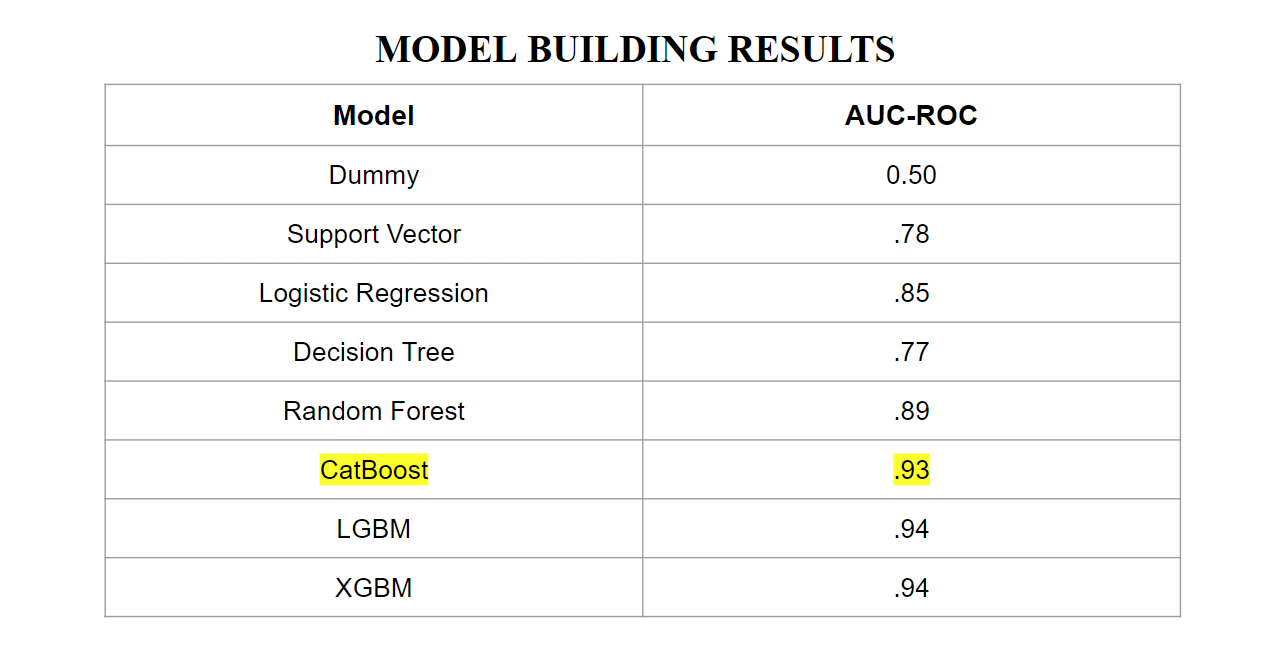

          train  test
Accuracy   0.93  0.86
F1         0.88  0.75
APS        0.96  0.87
ROC AUC    0.98  0.93


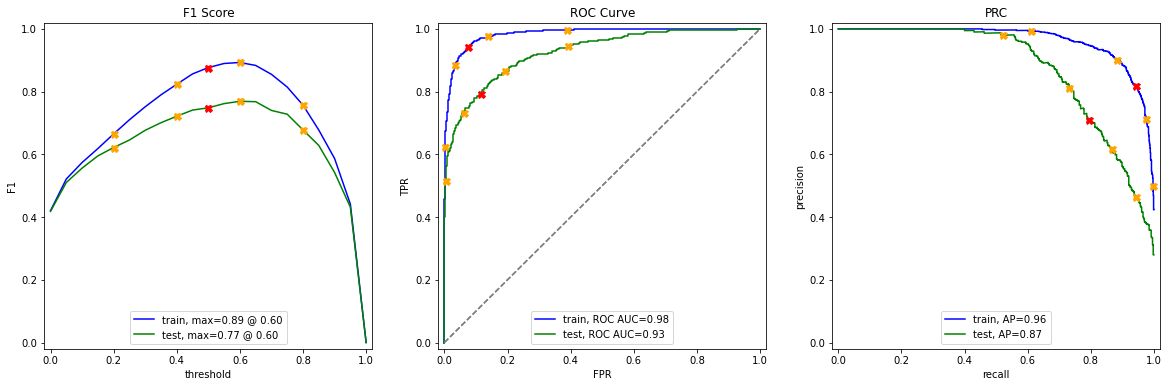

In [129]:
evaluate_model(cb, features_train, target_train, features_test, target_test)

* The CatBoost model resulted in an ROC-AUC score of 0.93 on the test set, which exceeds the desired threshold of the 0.88 metric.


# Final Conclusions/Thoughts

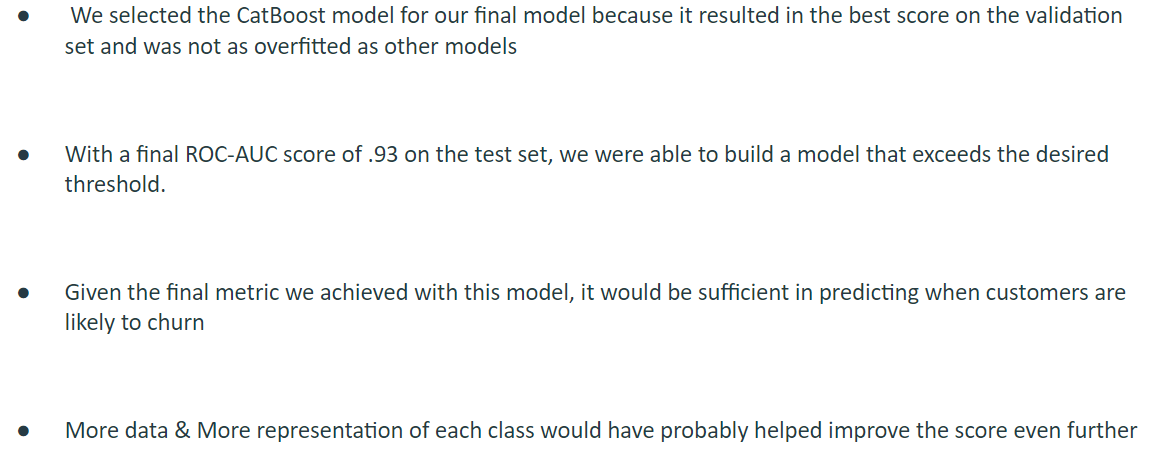
